## Process observations
This notebook loads and processes the CMASS NGC sample, plots them, and saves the n(z).

In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy.io import fits
# mpl.style.use('style.mcstyle')

In [2]:
# load survey

def load_galaxies(fname, fields):
    with fits.open(fname) as hdul:
        gals = np.array([hdul[1].data[x] for x in fields]).T
        gals = pd.DataFrame(gals, columns=fields)    
    return gals


fname = '../data/obs/galaxy_DR12v5_CMASS_North.fits'
fields = ['RA','DEC','Z',
          'WEIGHT_SYSTOT','WEIGHT_NOZ','WEIGHT_CP']
cmass = load_galaxies(fname, fields)

In [3]:
from astropy.cosmology import Planck18
from cmass.survey.tools import sky_to_xyz

cosmo = Planck18
crdz = cmass[['RA', 'DEC', 'Z']].values

from cmass.survey.ngc_selection import apply_mask
np.random.seed(0)
crdz = apply_mask(crdz, wdir='../data', fibermode=1)

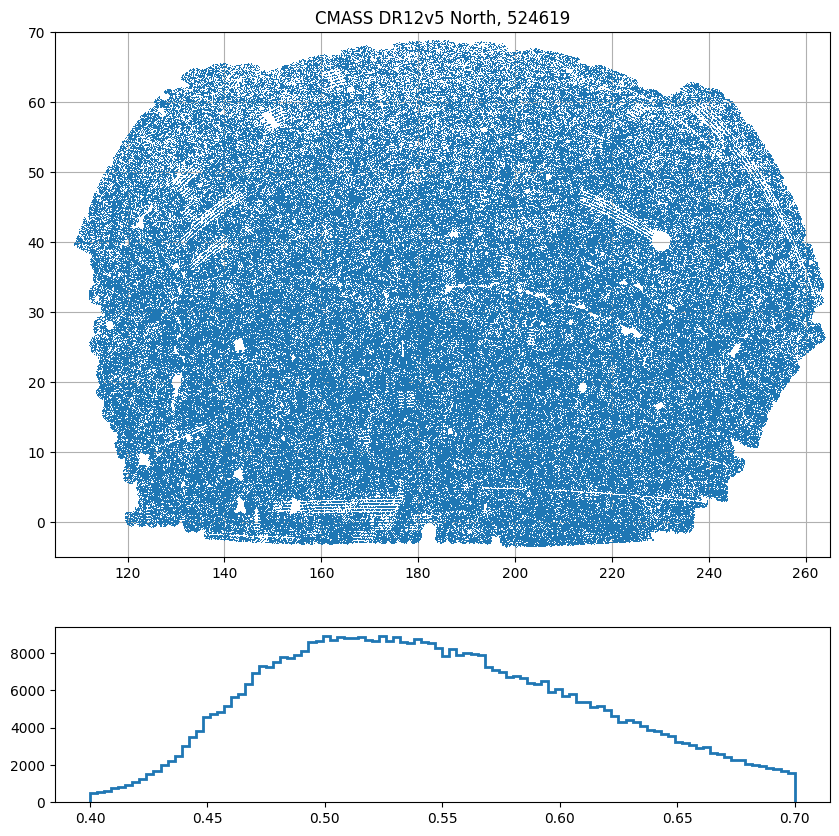

In [4]:
f, axs = plt.subplots(2, 1, figsize=(10, 10),
                      gridspec_kw={'height_ratios': [3, 1]})
axs[0].plot(crdz[:, 0], crdz[:, 1], ',', ms=1, alpha=1)
axs[0].set_title(f'CMASS DR12v5 North, {len(crdz)}')
axs[0].grid()
axs[0].set_xlim(105, 265)
axs[0].set_ylim(-5, 70)
axs[1].hist(crdz[:, 2], bins=100, histtype='step', lw=2);

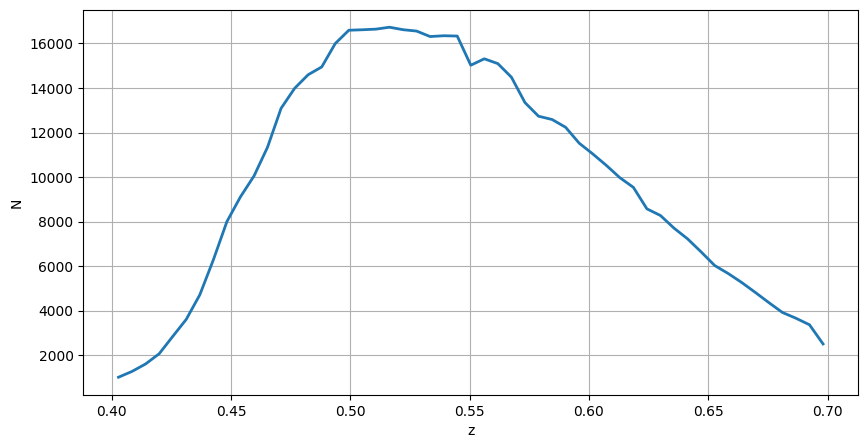

In [9]:
# get optimal binning
from astropy.stats import scott_bin_width
bw = scott_bin_width(crdz[:,2])
bw *= 2  # manual, for smoothness
be = np.arange(0.4, 0.7+bw, bw)

# get histogram
h, be = np.histogram(crdz[:,2], bins=be)

# plot
x_ = (be[1:] + be[:-1]) / 2
f, ax = plt.subplots( figsize=(10, 5))
ax.plot(x_, h, lw=2)
ax.set_xlabel('z')
ax.set_ylabel('N')
ax.grid()

In [10]:
# Save into desired location
outpath = '../cmass/lightcone/nz_DR12v5_CMASS_North_zmin0.4000_zmax0.7000.dat'
np.savetxt(outpath, h, delimiter='\n', fmt='%d')